<a href="https://colab.research.google.com/github/ethankyle360/ML4SupplyChain/blob/main/section_7_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import csv file
import pandas as pd
twentyeleven = pd.read_csv('twentyeleven.csv')

In [3]:
# Drop duplicates if any from the dataset
twentyeleven = twentyeleven.drop_duplicates()

In [9]:
# Get the week, get the day of the week, the month and year from the invoice date
twentyeleven.info()
twentyeleven['InvoiceDate'] = pd.to_datetime(twentyeleven['InvoiceDate'])
#twentyeleven['Week'] = twentyeleven['InvoiceDate'].dt.week

twentyeleven['dayofweek'] = twentyeleven['InvoiceDate'].dt.year

twentyeleven['month'] = twentyeleven['InvoiceDate'].dt.month
twentyeleven['year'] = twentyeleven['InvoiceDate'].dt.year
#twentyeleven['week'] = twentyeleven['InvoiceDate'].dt.week

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Invoice      484329 non-null  float64            
 1   StockCode    484330 non-null  object             
 2   Description  484330 non-null  object             
 3   Quantity     484330 non-null  int64              
 4   InvoiceDate  484330 non-null  datetime64[ns, UTC]
 5   Price        484330 non-null  float64            
 6   Customer ID  367058 non-null  float64            
 7   Country      484330 non-null  object             
 8   date         484330 non-null  object             
 9   revenue      484330 non-null  float64            
 10  year         484330 non-null  int32              
 11  dayofweek    484330 non-null  int32              
 12  month        484330 non-null  int32              
dtypes: datetime64[ns, UTC](1), float64(4), int32(3), int64(1), 

In [6]:
twentyeleven.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00+00:00,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00+00:00,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00+00:00,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [10]:
# Make a new column and call it month year with the month name and year.
twentyeleven['month_year'] = twentyeleven['InvoiceDate'].dt.strftime('%B %Y')

In [17]:
# Get the last purchase date per customer
twentyeleven['date'] = twentyeleven['InvoiceDate'].dt.strftime('%B- %Y')

#twentyeleven['date'] = pd.to_datetime(twentyeleven['date'])

max_date = twentyeleven['date'].max()

#customer_last = twentyeleven.groupby('CustomerID').agg(last_purchase_date = ('date','max')).reset_index()

#customer_last['recency'] = max_date-customer_last['last_purchase_date']

In [19]:
# Changing recency to an integer
#customer_last['recency'] = customer_last['recency'].astype['string'].str.replace()
#customer_last['recency'] = pd.to_numeric(customer_last['recency'].errors='coerce')

import matplotlib.pyplot as plt

#plt.hist(customer_last['recency'])

<Axes: xlabel='date'>

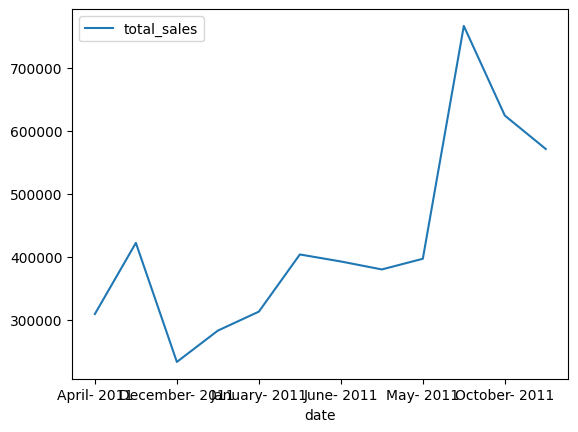

In [22]:
# Apply 2 weeks and 1 week moving average for the sales on the data
sales_per_day = twentyeleven.groupby('date').agg(total_sales=('Quantity', 'sum'))

sales_per_day.plot()

In [25]:
#sales_per_day['moving_7'] = sales_per_day.rolling(window=7).mean()
sales_per_day['moving_14'] = sales_per_day.total_sales.rolling(window=14).mean()

#sales_per_day['Aug-2011'].plot()